## Regularized Linear Models

A good way to reduce overfitting is to regularize the model. 

For exmaple, a simple way to regularize a polynomial model is to reduce the number of degrees it has. For a linear model, regularization is typically achieved by constraining the model's weights range.

Let's look at 3 other methods to constrain the weights of a linear model: 

## Logistic Regression

Logistic regression is commonly used to estimate the probability that an instance belongs to a certain class.

### Estimating Probabilities

Just like linear regression, a Logistic regression model computes a weighted sum of the features + a bias term. However, instead of outputting the result directly, it computes the logistic of it.

Let the input be $X \in \Bbb{R}^{m \times n}$ and parameters $\theta \in \Bbb{R}^{n \times 1}$:

$$\hat{p}=h_{\theta}(X)=\sigma(X\theta) \space ; \sigma(t)=\frac{1}{1+e^{-t}}$$

The logistic, denoted $\sigma(.)$ is a sigmoid function, that outputs a number between 0 and 1:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sigma_x = np.linspace(start=-10., stop=10., num=100)

In [4]:
def sigmoid(x):
    """calculates the output of the sigmoid function.
    
    # Arguments
        x: np.ndarray, the input to the sigmoid function
    
    # Returns
        y: np.ndarray, the output from the sigmoid function
    """
    return 1/(1 + np.exp(-x))

In [5]:
sigma_y = sigmoid(sigma_x)

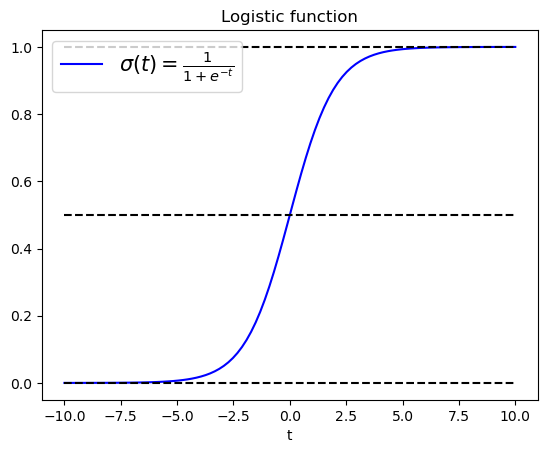

In [6]:
plt.plot(sigma_x, sigma_y, color='blue', label=r'$\sigma(t)=\frac{1}{1 + e^{-t}}$')
plt.plot([-10, 10], [1/2, 1/2], '--', color='black')
plt.plot([-10, 10], [1, 1], '--', color='black')
plt.plot([-10, 10], [0, 0], '--', color='black')
plt.xlabel('t')
plt.legend(loc='upper left', fontsize=15)
plt.title('Logistic function')
plt.show()

Once the logistic regression function has estimated the probability $\hat{p}$ that the instance belongs to the positive class, a prediction can be extracted:

$$\hat{y}=\begin{cases}1, & \text{if $\hat{p} \ge 0.5$} \\ 0, & \text{if $\hat{p} < 0.5$}\end{cases}$$

### Training and Cost Function

Now we know how a logistic regression model estimates probabilities and makes predictions. but how is it trained?

The objective of training is to set parameters $\theta$ for $h_{\theta}$ to predict high probabilities for positive instances and low probabilities for negative instances. We can capture this idea by presenting the following cost function:

$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})]$$
$$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}c^{(i)}(\theta) \space; c^{(i)}(\theta)=\begin{cases}log(\hat{p}^{(i)}) & if y^{(i)}=1 \\ log(1-\hat{p}^{(i)}) & if y^{(i)}=0\end{cases}$$

This function makes sense because:
- $-log(t)$ grows very large ($\to +\infty$) when $t \to 0$: a high cost for a positive instance labeled as negative.
- $-log(1-t)$ grows very large when $t \to 1$: a high cost for a negative instance labeled as positive.
- $-log(t)$ is close to $0$ when $t \to 1$: a low cost for a positive instance labeled as positive.
- $-log(1-t)$ is close to $0$ when $t \to 0$: a low cost for a negative instance labeled as negative.

The Bad News is that there is no known closed form equation to calculate $\hat{\theta}$ that minimizes $J(\theta)$. The Good News is that this cost function is Convex.

The partial derivative of $J(\theta)$ with regards to $\theta_{j}$ is:

$$\frac{\partial{J}}{\partial{\theta_{j}}}(\theta)=\frac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^{T}x^{(i)})-y^{(i)})x_{j}^{(i)}$$

This equation looks very similar to the gradient of Mean Squared Error.

### Decision Boundaries

Let's use the Iris dataset to illustrate Logistic Regression. We will build a classifier to detect the **Iris virginica** types based only on the **petal width** feature:

In [7]:
from sklearn import datasets

In [8]:
iris = datasets.load_iris()

In [9]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [10]:
iris.data.shape

(150, 4)

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
X = iris.data[:, 3:]  # Petal Width
y = (iris.target == 2).astype(np.int_)  # 1 if iris verginica, else 0

In [13]:
X.shape, y.shape

((150, 1), (150,))

Let's train a logistic regression model:

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression(solver='liblinear')

In [16]:
log_reg.fit(X, y)

LogisticRegression(solver='liblinear')

In [17]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

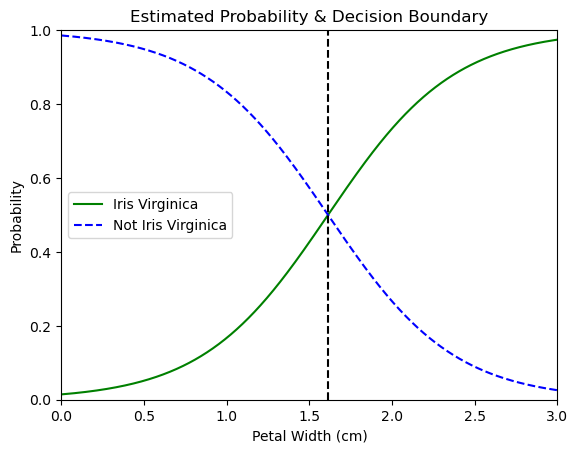

In [18]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')
plt.plot([1.61, 1.61], [0, 1], '--', color='black')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.title('Estimated Probability & Decision Boundary')
plt.xlim((0., 3.))
plt.ylim((0., 1.))
plt.legend(loc='center left', fontsize=10)
plt.show()

The decision boundary is at about 1.6 centemeter.

The `.predict()` method doesn't care about its confidance, it just outputs a binary indicator based on conditions (ex. if: $predicted\_proba > 0.5$):

In [19]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

<div style="text-align:center;"><img style="width: 50%;" src="static/imgs/2d_decision_boundary.png"></div>

This figure shows the same decision boundary but for two features: `petal length` and `petal width`. The colored lines show the boundaries associated with the confidance probabilities of the trained logistic regressor.

Just like other linear regressors, we can add $l1$ and $l2$ penalties to the loss function, `scikit-learn` does that for us by default.

### Softmax Regression

The logistic regression model can be generalized to support multi-class classification, without the need to combine multiple binary classifiers. The idea is simple, once given an instance vector, the model first outputs a score for each of the classes, then applies the softmax function to map the scores to a general probability distribution.

The equation to compute $s_k(x)$ should look familiar, for a single vector $x \in \Bbb{R}^{n \times 1}$:

$$s_{k}(x)=x^{T}\theta^{(k)}$$

Note that **each class has its own parameters vector $\theta^{(k)}$**. All these vectors are typically stored as rows in a parameter matrix $\Theta$.

Once we calculate the scores, we use the softmax function to map them to a normalized distribution:

$$\hat{p}_{k}=\sigma(s(x))_{k}=\frac{e^{s_{k}(x)}}{\sum_{j=1}^{K}e^{s_{j}(x)}}$$

- $K$: the number of classes.
- $s(x)$: the vector containing the score of each class for an instance $x$.
- $\sigma(s(x))_{k}$: the estimated probability that $x$ belongs to class $k$.

Softmax Regression predicts the class with the highest probability, meaning the class that got the biggest score:

$$\hat{y}=argmax_{k} \sigma(s(x))_{k}=argmax_{k}s_{k}(x)=argmax_{k}({\theta^{(k)}}^{T}x)$$

The $argmax$ operator returns the value of $k$ that maximizes the function.

We only use Softmax Regression with mutually execlusive classes (i.e. we want one class as an output). We should not use it for multi-output classification.

The loss function for Softmax Regression generalizes Logistic Regression Loss:

$$J(\Theta)=-\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K}y_{k}^{(i)}log(\hat{p}_{k}^{(i)})$$

$y_{k}^{(i)}$ is the binary target that indicates if a point $x^{(i)}$ belongs to class $k$. Notice that if $K=2$ the cost function is equivalent to the logistic regression's cost function.

Cross Entropy originated from Information theory. Suppose we want to transmit information about the weather everyday, if there are 8 options (sunny, rainy, ..), we can encode each option using 3 bits, because $2^{3}=8$. However, If we think it'll be sunny almost everyday, it's much more efficient to encode sunny as one $0$ & the other 7 conditions on 4 bits starting with 1.

Cross Entropy actually measures the average number of bits we send per option. If our assumption about the weather is correct, the cross entropy will be equal to the entropy in weather itself. If our assumption is wrong, the cross entropy will be greater by an amount called the *Kullback-Leibler (KL) Divergence*.

The cross entropy between two probability distributions *p* and *q* is defined as:

$$H(p,q)=-\sum{x}p(x)log(q(x))$$

The gradient vector of the cost function $J(\Theta)$ with regards to $\theta^{(k)}$ is:

$$\nabla_{\theta^{(k)}}J(\Theta)=\frac{1}{m}\sum_{i=1}^{m}(\hat{p}^{(i)}_{k}-y^{(i)}_{k})x^{(i)}$$

Let's use Softmax Regression to classify the flowers into their distinct 3 classes:

In [20]:
X = iris['data'][:, (2,3)]  # Petal Length & Width
X.shape

(150, 2)

In [21]:
y = iris['target']

In [22]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

In [23]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [24]:
softmax_reg.predict([[5,2]])

array([2])

In [25]:
(softmax_reg.predict_proba([[5,2]])*100).astype(int)

array([[ 0,  5, 94]])

---

---